In [34]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
# %matplotlib inline
from pandas import DataFrame
d =  pd.read_csv("adult.data")
# print(d)
# print(d.head())
d.columns = ["age","Type_employer","dfluwg","education","education_num","marital","occupation","relatioship","race","Sex","capital_gain","capital_loss","hr_per_week ","Country","income"]
d= d.replace(to_replace=" >50K",value="1")
d= d.replace(to_replace=" <=50K",value="-1")
incomes = pd.Series(d.income)
d =d.drop(columns=['income'],axis=1)
non_zero_entries = np.count_nonzero(d['capital_gain'], axis=0)
non_zero_entrie = np.count_nonzero(d['capital_loss'], axis=0)
# print(np.count(d['capital_gain'], axis=0))
# d.shape
zeros = 32560 - non_zero_entries
percentile =  ((zeros / 32560.0) * 100.0)
print("Percentile of Zeros entries in capital_gain : ",percentile)
# print(np.count(d['capital_loss'], axis=0))
d.shape
zero = 32560 - non_zero_entrie
percentile =  ((zero / 32560.0) * 100.0)
print("Percentile of Zeros entries in capital_loss : ",percentile)
# print(d.columns)
d=d.drop(columns=['capital_gain','capital_loss'])
print(d.describe())
print(d.shape)
print(d['education'].unique())
print(d['marital'].unique())
print(d['occupation'].unique())
print(d['relatioship'].unique())
print(d['race'].unique())
print(len(d['race'].unique()))
print(len(d['education'].unique()))
print(len(d['marital'].unique()))
print(len(d['occupation'].unique()))
print(len(d['relatioship'].unique()))
print(d['Sex'].value_counts())
pdf = pd.get_dummies(d[['Sex','education','occupation','relatioship','race','Country','marital','Type_employer']])
# print(type(pdf['Sex_ Male']))
frames = [d,pdf]

df = pd.concat(frames,axis=1,sort=False)
print("After Applying One-Hot-Encoding Shape of Data is",df.shape)
female_count_salery_gt50 =0
male_count_salery_gt50=0
female_count_salery_lt50 =0
male_count_salery_lt50=0
for i in range(0,len(df["Sex_ Male"])):
    if(df["Sex_ Male"][i] == 1 and incomes[i] == '1'):
        # print(df["Sex_ Male"][i] ,incomes[i])
        male_count_salery_gt50 +=1
    elif(df["Sex_ Female"][i] == 1 and incomes[i] == '1'):
        female_count_salery_gt50 +=1
    elif(df["Sex_ Male"][i] == 1 and incomes[i] == '-1'):
        male_count_salery_lt50 +=1
    else:
        female_count_salery_lt50 +=1            
count_male_age = 0
count_female_age = 0
avg_female_age = 0
avg_male_age = 0
for i in range(0,len(df['age'])):
    if df['Sex_ Male'][i] == 1 and incomes[i] == '1':
        count_male_age = count_male_age + df['age'][i]
    elif df['Sex_ Male'][i] == 1 and incomes[i] == '-1':
        count_female_age = count_female_age + df['age'][i]
    else:
        continue    

avg_male_age = int(count_male_age / len(df['age']))
avg_female_age = int(count_female_age / len(df['age']))


print("Avg age of male having salery > 50k : " , avg_male_age)
print("Avg age of female having salery > 50k : " ,avg_female_age)

print("Standard Deviation of male is : ",df["Sex_ Male"].std())
print("Standard Deviation of female is : ",df["Sex_ Female"].std())

print("Skewness Of male is : ",df["Sex_ Male"].skew())
print("Skewness Of female is : ",df["Sex_ Female"].skew())

mean_male_age = 0
mean_female_age = 0
for i in range(len(df['Sex_ Male'])):
    if df['Sex_ Male'][i] == 1:
        mean_male_age = df['age'].mean()
    else:
        mean_female_age = df['age'].mean()

print("Mean of Male Age is : ",mean_male_age)
print("Mean of Female Age is : ",mean_female_age)
print("Difference of Mean male and female age : ",mean_female_age-mean_male_age)




list1 = []
list2 = []
for i in range(0,len(df['Sex_ Male'])):
    if df["Sex_ Male"][i] == 1 and incomes[i] == '1':
        list1.append(df["Sex_ Male"][i])
    elif df["Sex_ Female"][i] == 1 and incomes[i] == '1':
        list2.append(df["Sex_ Female"][i])
    else:
        continue

print("Male having Salery > 50K : ",male_count_salery_gt50)        
print("Female having Salery < 50K : ",female_count_salery_lt50)


print("Female having Salery > 50K : ",female_count_salery_gt50)
print("Male having Salery > 50K : ",male_count_salery_gt50)
print("Male having Salery < 50K : ",male_count_salery_lt50)
print("Female having Salery < 50K : ",female_count_salery_lt50)


('Percentile of Zeros entries in capital_gain : ', 91.67383292383292)
('Percentile of Zeros entries in capital_loss : ', 95.33476658476658)
                age        dfluwg  education_num  hr_per_week 
count  32560.000000  3.256000e+04   32560.000000  32560.000000
mean      38.581634  1.897818e+05      10.080590     40.437469
std       13.640642  1.055498e+05       2.572709     12.347618
min       17.000000  1.228500e+04       1.000000      1.000000
25%       28.000000  1.178315e+05       9.000000     40.000000
50%       37.000000  1.783630e+05      10.000000     40.000000
75%       48.000000  2.370545e+05      12.000000     45.000000
max       90.000000  1.484705e+06      16.000000     99.000000
(32560, 12)
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' M

AxesSubplot(0.125,0.125;0.775x0.755)


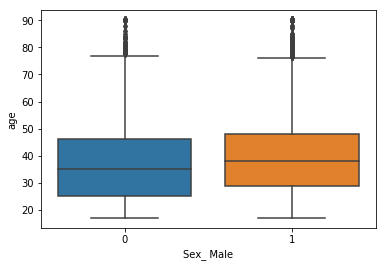

In [5]:
print(sb.boxplot(x = df['Sex_ Male'], y = df['age']))

AxesSubplot(0.125,0.125;0.775x0.755)


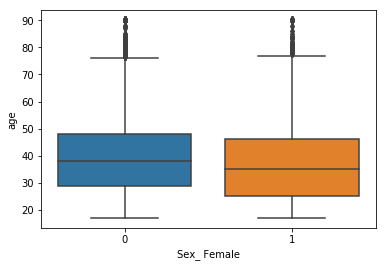

In [7]:
print(sb.boxplot(x = df['Sex_ Female'], y = df['age']))

In [9]:
df.columns

Index([u'age', u'Type_employer', u'dfluwg', u'education', u'education_num',
       u'marital', u'occupation', u'relatioship', u'race', u'Sex',
       ...
       u'marital_ Widowed', u'Type_employer_ ?', u'Type_employer_ Federal-gov',
       u'Type_employer_ Local-gov', u'Type_employer_ Never-worked',
       u'Type_employer_ Private', u'Type_employer_ Self-emp-inc',
       u'Type_employer_ Self-emp-not-inc', u'Type_employer_ State-gov',
       u'Type_employer_ Without-pay'],
      dtype='object', length=114)

AxesSubplot(0.125,0.125;0.775x0.755)


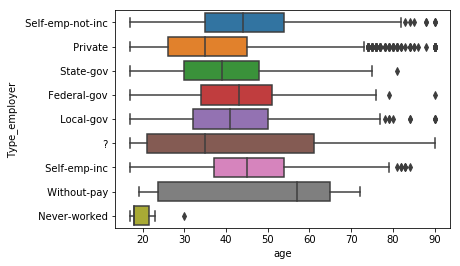

In [10]:
print(sb.boxplot(x = df['age'], y = df['Type_employer']))

AxesSubplot(0.125,0.125;0.775x0.755)


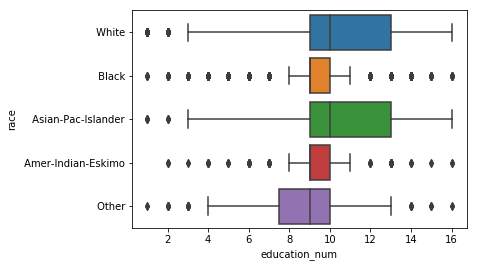

In [12]:
print(sb.boxplot(x = df['education_num'], y = df['race']))

AxesSubplot(0.125,0.125;0.775x0.755)


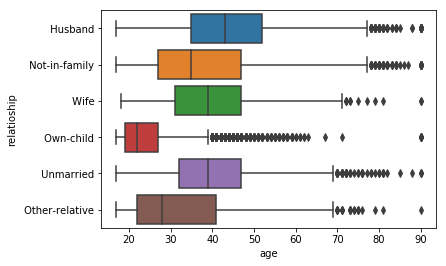

In [13]:
print(sb.boxplot(x = df['age'], y = df['relatioship']))

AxesSubplot(0.125,0.125;0.775x0.755)


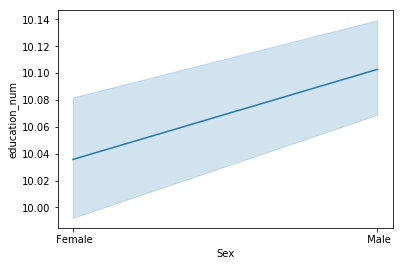

In [17]:
print(sb.lineplot(x = df['Sex'], y = df['education_num']))

In [33]:
# print(sb.lineplot(x = male_count_salery_gt50, y =female_count_salery_gt50))

AxesSubplot(0.125,0.125;0.775x0.755)


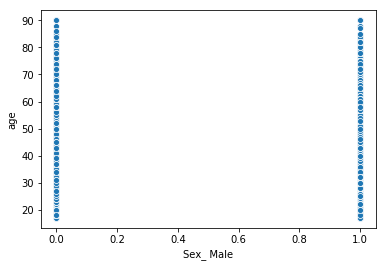

In [32]:
print(sb.scatterplot(x='Sex_ Male', y='age', data=df))

In [ ]:
# df.plot.line(x='age', y=list1)    







# for i in range(0,len(df['age'])):
#     if df['Sex_ Male'][i] == 1 and df['age'][i] == avg_male_age:


# avg = 0
# avg_fe =0
# for i in range(0,len(d["age"])):
#     if(df["Sex_ Male"][i] == 1 and incomes[i] == '1'):
#         avg = d['age'][i].mean()
#     elif(df["Sex_ Female"][i] == 1 and incomes[i] == '-1'):
#         avg_fe = d['age'][i].mean()            
   
#     else:
#         continue
        

# print(avg)
# print(avg_fe)
# print("Mean Difference Btw Female And Male Age",avg_fe - avg)

# print(df.skew(axis =0))

# graph = pt.scatter(x ='Female' , y = 'female_count_salery_gt50')
# print(graph)

# print(sb.boxplot(x='age', y='Sex_ Male', data=df))
# print("Female having Salery > 50K : ",female_count_salery_gt50)

# print("Male having Salery < 50K : ",male_count_salery_lt50)

# print(df['Sex_ Male'].std())
# avg =( female_count_salery_gt50 / 10771.0)
# print(avg)
 
# 
# avg_age_male_count_salery_gt50 = male_count_salery_gt50 / male_count
# ----imp wokk up
# print()

# for i in range(0,len(df["Sex_ Male"])):
#     if(df["Sex_ Male"][i] == 1):
#         # print(d['age'][i])
#         avg_male_age = ((d['age'][i] / male_count) * 32560)
        
#     else:
#         avg_female_age =( (d['age'][i] / female_count) * 32560)

# print(avg_male_age)
# print(avg_female_age)
# avg_age_fe = df['Sex_ Female'].mean()
# avg_age_ma = df['Sex_ Male'].mean()
# print(avg_age_fe * )
# print(avg_age_ma)
# avg_male_age = 0
# avg_female_age =0 



# male_count =0
# female_count=0
# for i in range(0,len(df["Sex_ Male"])):
#     if(df["Sex_ Male"][i] == 1):
#         print()
#     else:
#         female_count +=1   
# print("Standard Deviation of Male : ",df["Sex_ Male"].std())
# print("Standard Deviation of Female : ",df["Sex_ Female"].std())

# print(male_count.std())
# print(female_count.std())





# print(d[d.loc("Sex")])
# print(df["Sex_ Male"])
# print(df["Sex_ Male"].equals('1'))
# print(df["Sex_ Female"].equals(0))
# rows = d["Sex"].loc["Male"]
# print(type(rows))
# print(df['Sex_ Male'].loc[0])
# print(d.columns)
# print(incomes[0])
# male_count = incomes == '0'  & df['Sex'] = '1' 
# print(df[df[Sex_ Male == "Male"]])



# for i in range(len(incomes)):
#     if(incomes[i] == "1"):
#         if(df[df["Male_ Sex"] ==  "1"]):
#             # print("Male")
#             male_count_salery_gt50 +=1
#         else:
#             female_count_salery_gt50 +=1

#     else:
#         if(df.loc["Sex_ Male"] ==  "1"]):
#             male_count_salery_lt50 +=1
#         else:
#             female_count_salery_lt50 +=1 
                       

# print(d.head())
# print(incomes)
# for i in range(len(incomes)):
#     if(incomes[i] == "1"):
#         if(d["Sex"] ==  str("Male")).any():
#             # print("Ma")
#             male_count +=1
#         elif (d["Sex"] ==  str("Female")).any():
#             female_count +=1
#         else:
#             male_count = male_count
#             female_count = female_count
#     else:
#         print("this")
# for i in range(len(incomes)):
#     if (incomes[i] == "1" ):
#         if((pdf["Sex_ Male"] == 1)):
#             male_count +=1
#         else:
#             female_count +=1    

#         # for j in pdf['Sex_ Male']:
        

# for i in d["Sex"]:
#     if(i == "Male"):
#         for i in range(len(incomes)):
#             if(incomes[i] == "1"):
#                 male_count +=1
#             else:
#                 continue    
#     else:
#         for i in range(len(incomes)):
#             if(incomes[i] == "-1"):
#                 female_count +=1
#             else:
#                 continue    

















# avg = 0
# avg_fe =0
# for i in range(0,len(d["age"])):
#     if(df["Sex_ Male"][i] == 1 and incomes[i] == '1'):
#         avg = d['age'][i].mean()
#     elif(df["Sex_ Female"][i] == 1 and incomes[i] == '-1'):
#         avg_fe = d['age'][i].mean()            
   
#     else:
#         continue
        

# print(avg)
# print(avg_fe)
# print("Mean Difference Btw Female And Male Age",avg_fe - avg)

# print(df.skew(axis =0))

# graph = pt.scatter(x ='Female' , y = 'female_count_salery_gt50')
# print(graph)

# print(sb.boxplot(x='age', y='Sex_ Male', data=df))
# print(df['Sex_ Male'].std())
# avg =( female_count_salery_gt50 / 10771.0)
# print(avg)
 
# 
# avg_age_male_count_salery_gt50 = male_count_salery_gt50 / male_count
# ----imp wokk up
# print()

# for i in range(0,len(df["Sex_ Male"])):
#     if(df["Sex_ Male"][i] == 1):
#         # print(d['age'][i])
#         avg_male_age = ((d['age'][i] / male_count) * 32560)
        
#     else:
#         avg_female_age =( (d['age'][i] / female_count) * 32560)

# print(avg_male_age)
# print(avg_female_age)
# avg_age_fe = df['Sex_ Female'].mean()
# avg_age_ma = df['Sex_ Male'].mean()
# print(avg_age_fe * )
# print(avg_age_ma)
# avg_male_age = 0
# avg_female_age =0 



# male_count =0
# female_count=0
# for i in range(0,len(df["Sex_ Male"])):
#     if(df["Sex_ Male"][i] == 1):
#         print()
#     else:
#         female_count +=1   
# print("Standard Deviation of Male : ",df["Sex_ Male"].std())
# print("Standard Deviation of Female : ",df["Sex_ Female"].std())

# print(male_count.std())
# print(female_count.std())





# print(d[d.loc("Sex")])
# print(df["Sex_ Male"])
# print(df["Sex_ Male"].equals('1'))
# print(df["Sex_ Female"].equals(0))
# rows = d["Sex"].loc["Male"]
# print(type(rows))
# print(df['Sex_ Male'].loc[0])
# print(d.columns)
# print(incomes[0])
# male_count = incomes == '0'  & df['Sex'] = '1' 
# print(df[df[Sex_ Male == "Male"]])



# for i in range(len(incomes)):
#     if(incomes[i] == "1"):
#         if(df[df["Male_ Sex"] ==  "1"]):
#             # print("Male")
#             male_count_salery_gt50 +=1
#         else:
#             female_count_salery_gt50 +=1

#     else:
#         if(df.loc["Sex_ Male"] ==  "1"]):
#             male_count_salery_lt50 +=1
#         else:
#             female_count_salery_lt50 +=1 
                       

# print(d.head())
# print(incomes)
# for i in range(len(incomes)):
#     if(incomes[i] == "1"):
#         if(d["Sex"] ==  str("Male")).any():
#             # print("Ma")
#             male_count +=1
#         elif (d["Sex"] ==  str("Female")).any():
#             female_count +=1
#         else:
#             male_count = male_count
#             female_count = female_count
#     else:
#         print("this")
# for i in range(len(incomes)):
#     if (incomes[i] == "1" ):
#         if((pdf["Sex_ Male"] == 1)):
#             male_count +=1
#         else:
#             female_count +=1    

#         # for j in pdf['Sex_ Male']:
        

# for i in d["Sex"]:
#     if(i == "Male"):
#         for i in range(len(incomes)):
#             if(incomes[i] == "1"):
#                 male_count +=1
#             else:
#                 continue    
#     else:
#         for i in range(len(incomes)):
#             if(incomes[i] == "-1"):
#                 female_count +=1
#             else:
#                 continue    


